<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/HAR/har_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path=os.path.join(os.getcwd(), 'drive', 'MyDrive', 'datasets', 'UCI HAR Dataset')

#특성 추출
features=list()
with open(os.path.join(data_path, 'features.txt')) as f:
        features=[line.split()[1] for line in f.readlines()]
print('No of Features:{}'.format(len(features)))

No of Features:561


In [3]:
#delim_whitespace: 공백으로 구분된 값으로 파일 읽기
X_train=pd.read_csv(os.path.join(data_path, 'train', 'X_train.txt'), delim_whitespace=True, header=None)
X_train.columns=features
X_train['subject']=pd.read_csv(os.path.join(data_path, 'train', 'subject_train.txt'), header=None).squeeze('columns')

y_train=pd.read_csv(os.path.join(data_path, 'train', 'y_train.txt'), names=['Activity']).squeeze('columns')
y_train_labels=y_train.map({1:'WALKING',
                            2:'WALKING_UPSTAIRS',
                            3:'WALKING_DOWNSTAIRS',
                            4:'SITTING',
                            5:'STANDING',
                            6:'LAYING'})
train=X_train
train['Activity']=y_train
train['ActivityName']=y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1482,0.274919,-0.03414,-0.107513,-0.966594,-0.899845,-0.926221,-0.973188,-0.910633,-0.923163,-0.881453,...,-0.044333,-0.495482,-0.415648,-0.767269,-0.831017,0.192392,-0.054108,7,5,STANDING


In [4]:
X_test=pd.read_csv(os.path.join(data_path, 'test', 'X_test.txt'), delim_whitespace=True, header=None)
X_test.columns=features
X_test['subject']=pd.read_csv(os.path.join(data_path, 'test', 'subject_test.txt'), header=None).squeeze('columns')
y_test=pd.read_csv(os.path.join(data_path, 'test', 'y_test.txt'), names=['Activity']).squeeze('columns')
y_test_labels=y_test.map({1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})
test=X_test
test['Activity']=y_test
test['ActivityName']=y_test_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1140,0.208672,0.002149,-0.110192,0.009746,0.206017,-0.49589,-0.040282,0.16475,-0.477613,0.24712,...,0.807305,-0.844036,0.887524,-0.650526,-0.699743,0.305582,0.015922,6,2,WALKING_UPSTAIRS


In [5]:
#중복값 체크하기
print('No of duplicates in train:{}'.format(sum(train.duplicated())))
print('No of duplicates in test:{}'.format(sum(test.duplicated())))

No of duplicates in train:0
No of duplicates in test:0


In [6]:
#결측치 체크하기
#결측치가 있으면 학습 자체가 안 되는 경우도 있기 때문에... 꼭 제거
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


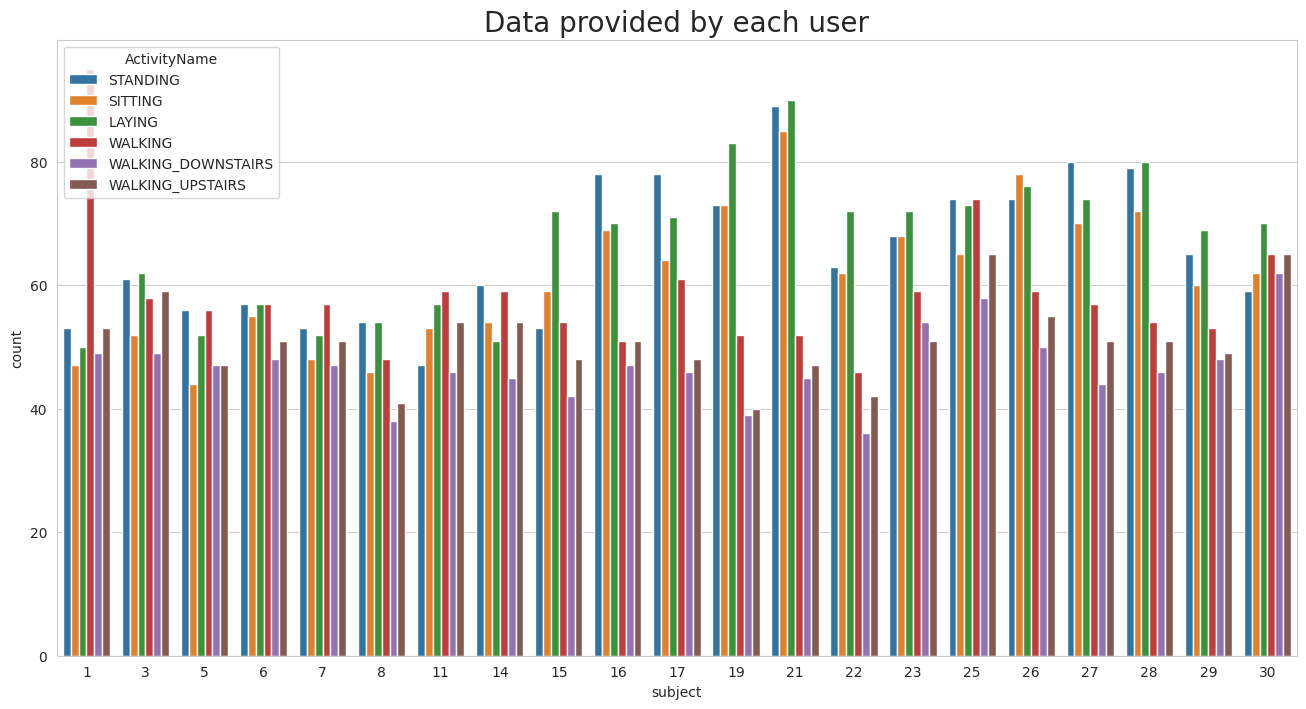

In [7]:
#각 사람별 행동 데이터 분포
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject', hue='ActivityName', data=train)
plt.show()

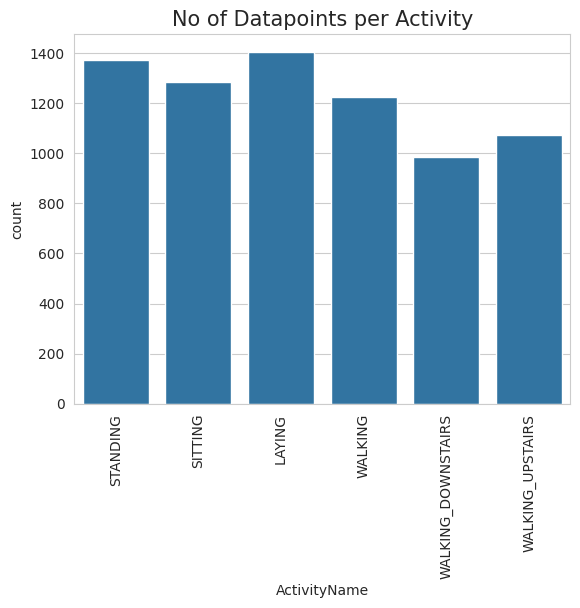

In [8]:
#전체적인 행동 데이터의 분포
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(x="ActivityName", data=train)
plt.xticks(rotation=90)
plt.show()

In [9]:
#컬럼명 수정(불필요한 특수문자 제거)
columns=train.columns
columns=columns.str.replace('(','').str.replace(')', '').str.replace('-','_').str.replace(',', '')

train.columns=columns
test.columns=columns
test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [13]:
#데이터셋을 csv 파일로 저장
train.to_csv(os.path.join('/content/drive/MyDrive/src/data/train.csv'), index=False)
test.to_csv(os.path.join('/content/drive/MyDrive/src/data/test.csv'), index=False)